In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
!pip install tensorflow==2.5

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 462 kB 42.1 MB/s 
     |████████████████████████████████| 1.2 MB 68.1 MB/s 
     |████████████████████████████████| 4.0 MB 63.4 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [3]:
!pip install keras==2.4.3

  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [4]:
dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [5]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,3.728215,15.4,44.0,7800.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,3.874993,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,4.944903,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,3.462571,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
dataset=dataset.drop(['age','bp','sg','al','su','bgr','wc','appet','pe','ane'],1)#rfe

In [7]:
dataset.shape

(400, 15)

In [8]:
# dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
# dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
# dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
# dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
# dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
# dataset.rename(columns={'classification':'class'},inplace=True)

In [9]:
# Further cleaning
# dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
# dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
# dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
# dataset.drop('id',axis=1,inplace=True)

In [10]:
dataset.head()

,bu,sc,sod,pot,hemo,pcv,rc,rbc,pc,pcc,ba,htn,dm,cad,class
0,36.0,1.2,138.672705,3.728215,15.4,44.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,18.0,0.8,130.739113,3.874993,11.3,38.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53.0,1.8,132.762387,4.944903,9.6,31.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,3.8,111.000000,2.500000,11.2,32.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,26.0,1.4,133.960632,3.462571,11.6,35.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# # '?' character remove process in the dataset
# for i in ['rc','wc','pcv']:
#     dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [12]:
# # Filling missing numeric data in the dataset with mean
# for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
#     dataset[i].fillna(dataset[i].mean(),inplace=True)

In [13]:
#dataset.isnull().sum()

In [14]:
#dataset = dataset.dropna(axis=1)

In [15]:
dataset.shape

(400, 15)

In [16]:
#dataset.isnull().sum()

In [17]:
dataset.head()

,bu,sc,sod,pot,hemo,pcv,rc,rbc,pc,pcc,ba,htn,dm,cad,class
0,36.0,1.2,138.672705,3.728215,15.4,44.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,18.0,0.8,130.739113,3.874993,11.3,38.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53.0,1.8,132.762387,4.944903,9.6,31.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,3.8,111.000000,2.500000,11.2,32.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,26.0,1.4,133.960632,3.462571,11.6,35.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#dataset

In [19]:
dataset.iloc[:,:-1]

,bu,sc,sod,pot,hemo,pcv,rc,rbc,pc,pcc,ba,htn,dm,cad
0,36.0,1.2,138.672705,3.728215,15.4,44.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,18.0,0.8,130.739113,3.874993,11.3,38.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,1.8,132.762387,4.944903,9.6,31.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,3.8,111.000000,2.500000,11.2,32.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,26.0,1.4,133.960632,3.462571,11.6,35.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49.0,0.5,150.000000,4.900000,15.7,47.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,31.0,1.2,141.000000,3.500000,16.5,54.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,26.0,0.6,137.000000,4.400000,15.8,49.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,50.0,1.0,135.000000,4.900000,14.2,51.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#dataset.to_csv('dataset_final.csv', index=False)

In [21]:
#files.download('dataset_final.csv') 

In [22]:
dataset.iloc[:,-1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [23]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [28]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [29]:
import keras
import sklearn.model_selection
import numpy as np
import pandas as pd

In [30]:

import time
start_time = time.time()
model = keras.models.Sequential()
model.add(keras.layers.normalization.BatchNormalization(input_shape=tuple([X_train.shape[1]])))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.core.Dense(1, activation='sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=200,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
10/10 [==============================] - 1s 28ms/step - loss: 0.7716 - accuracy: 0.5375 - val_loss: 0.6650 - val_accuracy: 0.6250
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.5875 - val_loss: 0.6336 - val_accuracy: 0.8500
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6875 - val_loss: 0.6060 - val_accuracy: 0.8375
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5531 - accuracy: 0.7031 - val_loss: 0.5762 - val_accuracy: 0.8750
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7688 - val_loss: 0.5473 - val_accuracy: 0.8500
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8094 - val_loss: 0.5192 - val_accuracy: 0.8750
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.8281 - val_loss: 0.4919 - val_accuracy: 0.9000
Epoch 8/200


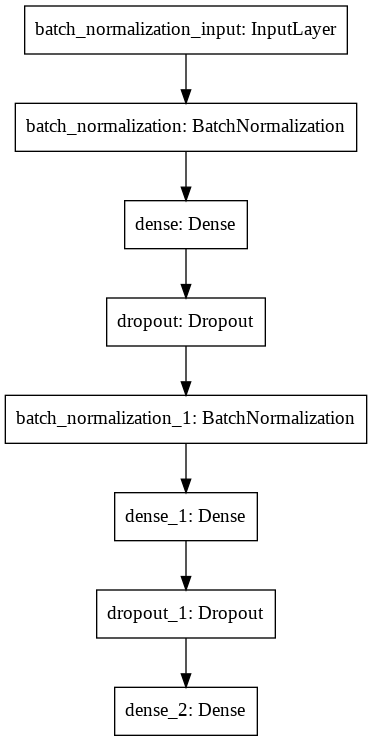

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_mlp_rfe.png')

In [32]:
# from google.colab import files
# files.download('model_plot_mlp_rfe.png') 

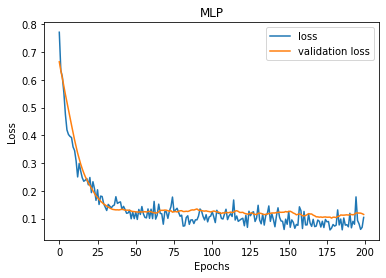

In [33]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('MLP.png', dpi=100)

In [34]:
files.download('MLP.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        28
         1.0       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [38]:
print(confusion_matrix(y_test,predictions))

[[28  0]
 [ 3 49]]


In [39]:
from sklearn.metrics import accuracy_score
first = 0
second = 50
prediction_accuracy = []
for i in range(8):
  X_test_ = dataset.iloc[first:second,:-1].values
  y_true = dataset.iloc[first:second,-1].values

  #X_test_  = scaler.transform(X_test_)
  y_pred = model.predict_classes(X_test_)
  accuracy = accuracy_score(y_true, y_pred)
  prediction_accuracy.append(accuracy)
  first = second
  second = second+50
prediction_accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0.02, 0.02, 0.02, 0.02, 0.02, 1.0, 1.0, 1.0]

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9711538461538461

Text(0.5, 0, 'False Positive Rate')

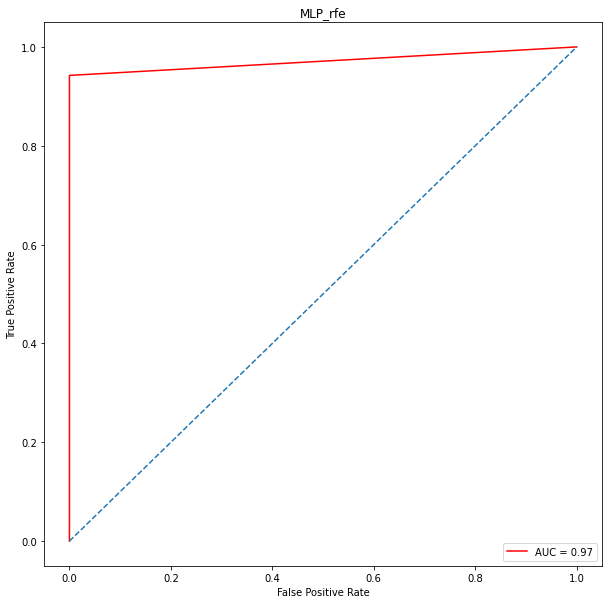

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('MLP_rfe')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [42]:
data = {
    'MLP_false': false_positive_rate,
    'MLP_true': true_positive_rate,
    'MLP_prediction_accuracy': prediction_accuracy
  }

In [43]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [44]:
df.to_csv('mlp_rfe_output.csv', index=False)

In [45]:
# files.download('mlp_rfe_output.csv') 